<a href="https://colab.research.google.com/github/fariskn123/Faris-Projects/blob/main/Data%20Analytics/Faris_Ing_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# A Detailed Look Into Restaurant Ingredients in Suffolk County (Boston) MA

I am a founding partner in a startup called SupplyNow, which aggregates ingredient ordering for local restaurants, bakeries, home-bakers, and breweries to help them collectively bargain with well-known suppliers for better pricing on their ingredients. By aggregating their order with other local shops, we help these small businesses reduce their ingredient costs. In this project, I will be looking at restaurants' dish and optional ingredients to find the ones most commonly used. I hope to help my startup refine which ingredients we focus on devoping supplier relationships for. To do this, I am going to be answering the following questions:

*   What are the most frequently used ingredients in dishes?
*   What are the most frequently used ingredients in options?
*   My solution is to come up with a "Hot-list' of ingredients.

## Data Sources

[Sales data from Kaggle](https://www.kaggle.com/pepperapi/boston-restaurants-menus-ingredients-nutrition?select=option-ingredients-2020-09-15.csv)

The most interesting fields for this analysis are:
 * Dish-ingredients - Ingredients for every dish (includes a serving amount in grams)
 * Option-ingredients - Ingredients for every option (includes a serving amount in grams)
 * Ingredients - Each unique ingredient included

## Plan/Design/Methodology/etc.

I've included comments walking through the code and the following diagrams.

    


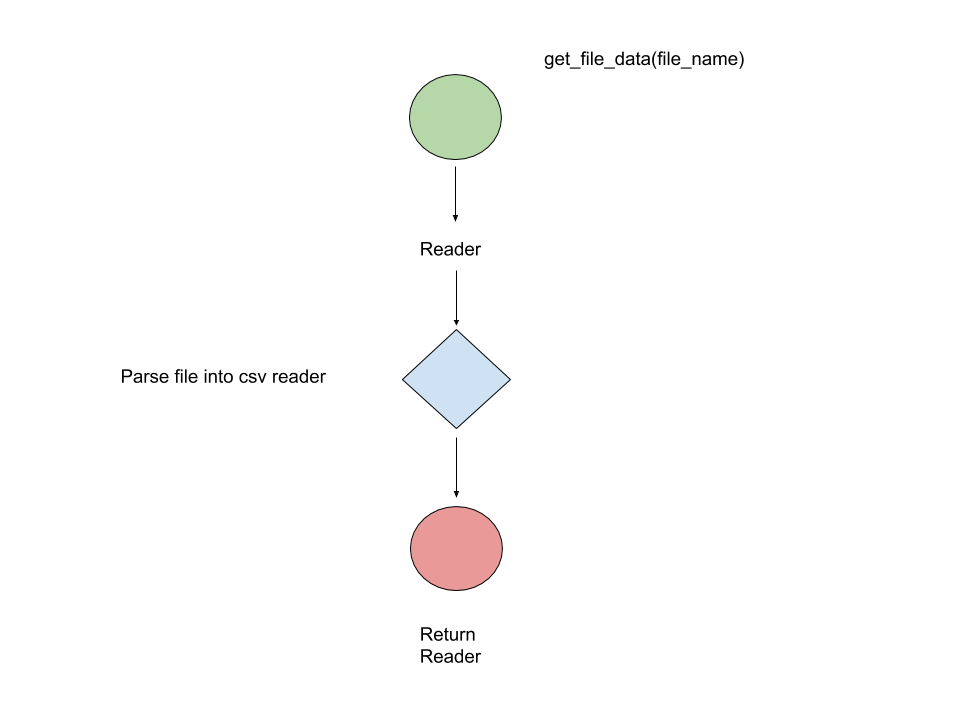

In [ ]:
from IPython.display import Image

Image(filename='gdrive/My Drive/get_file_data.png')

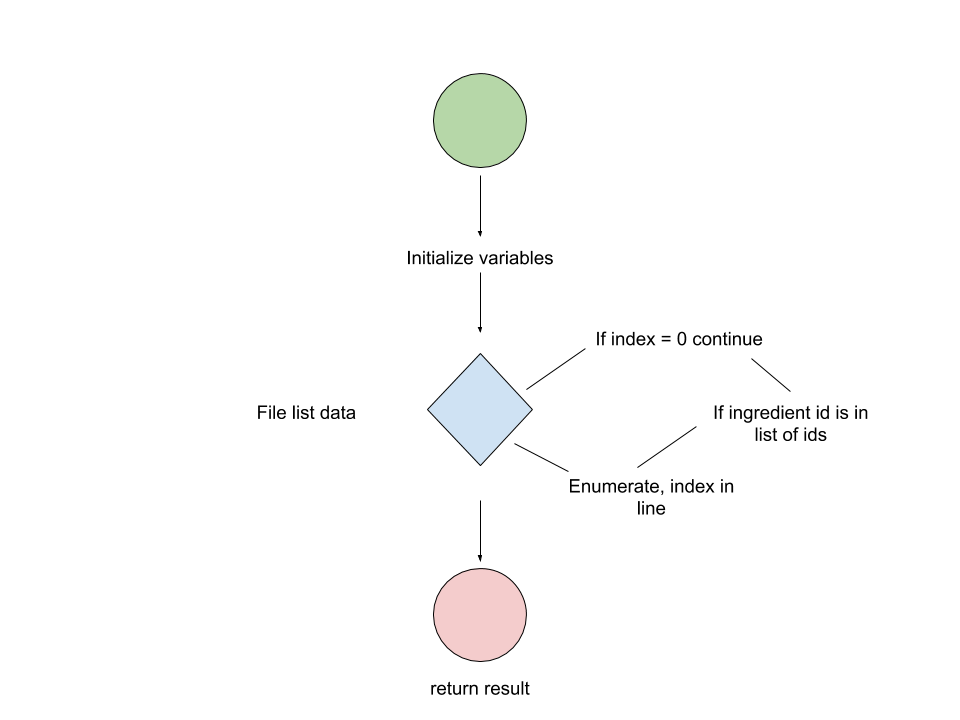

In [ ]:
Image(filename='gdrive/My Drive/find_ingredient_usage.png')

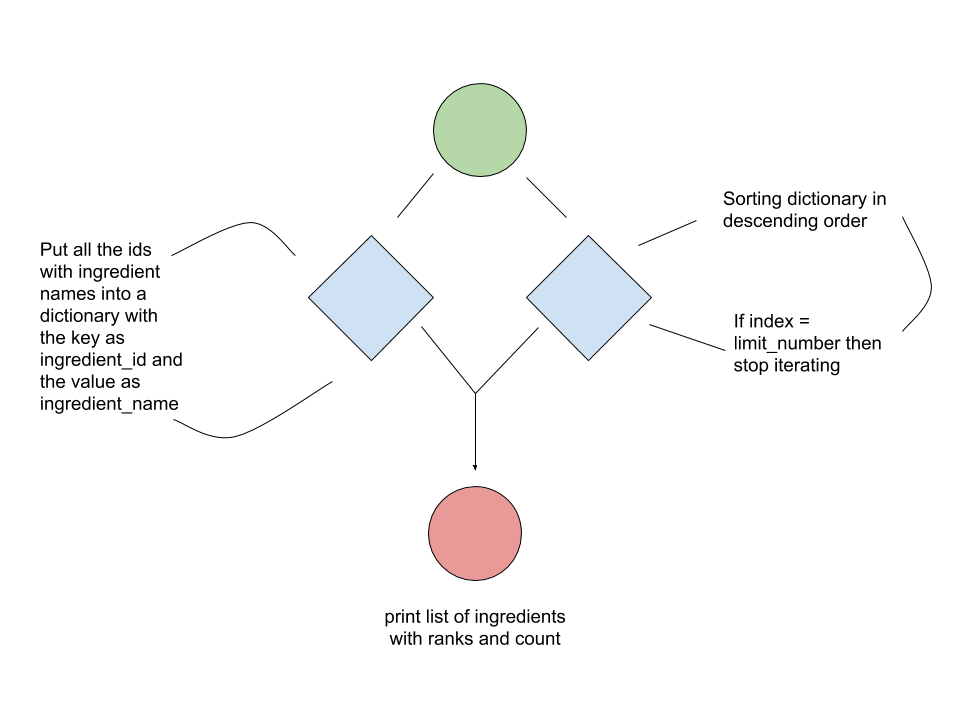

In [ ]:
Image(filename='gdrive/My Drive/print_top.png')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Data Analyis

In [ ]:
def get_file_data(file_name):
  try:
    # Using a CSV
    reader = csv.reader(open(file_name))
    return reader
  except FileNotFoundError:
    print("Could not open this file")

def find_ingredient_usage(file_list_data):
  freq = 0
  starting_line = ""
  result = {}
  for index, line in enumerate(file_list_data):

    if index == 0:
      continue

    if line[1] in result:
        result[line[1]] = result[line[1]] + 1 #result_list [ingredient_id] = ingredient_id_count + 1
    else:
        result[line[1]]  = 1 #result_list [ingredient_id] = 1

  return result


def print_top(top_num, file_data, ingredient_names):
    results = find_ingredient_usage(file_data)
    ## sorting dictionary {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
    results = {k: v for k, v in sorted(results.items(), reverse=True, key=lambda item: item[1] )} #sort disctionary in descending order

    for idx, ids in enumerate(results.keys()):
        if idx == top_num: #if index = limit_number then stop iterating
            break
        print("Rank {} Count: {}  Name: {}".format(idx+1, results[ids], ingredient_names[ids]))

suffix = "ingredients-2020-09-15.csv"

ingredient_data = get_file_data("gdrive/MyDrive/pythonproject/{}".format(suffix))
dish_data = get_file_data("gdrive/MyDrive/pythonproject/dish-{}".format(suffix))
option_data = get_file_data("gdrive/MyDrive/pythonproject/option-{}".format(suffix))


"""
ingredient_data = get_file_data(suffix)
dish_data = get_file_data("dish-{}".format(suffix))
option_data = get_file_data("option-{}".format(suffix))
"""
count = 0
ingredient_name = ""
ingredient_name_option = ""
top_id = ""
top_id_opt = ""
count_opt = 0
found_ids = []
found_ids_opts = []
top = 0
results = {}
ingredient_names = {}
#the purpose of this loop is to put all the ids with their ingredient names into a dictionary with the key as as ingredient_id and the value as the ingredient_name
for idx, i in enumerate(ingredient_data):
    if idx == 0 or i[0] in found_ids:
        continue
    #i = i.strip().split(",")
    ingredient_id = i[0]
    temp_ingredient_name = i[1] #",".join(i[1:])
    ingredient_names[ingredient_id] = temp_ingredient_name
    found_ids.append(ingredient_id)


# pass in the top 50 data source, and list of ingredients with their ids.
# number can be changed.
print_top(50, dish_data, ingredient_names )
print("And for dish options...!")
print_top(50, option_data, ingredient_names )


Rank 1 Count: 40241  Name: salt, table
Rank 2 Count: 30323  Name: spices, pepper, black
Rank 3 Count: 25941  Name: garlic, raw
Rank 4 Count: 24323  Name: onions, raw
Rank 5 Count: 19799  Name: olive oil
Rank 6 Count: 16828  Name: tomatoes, raw
Rank 7 Count: 15249  Name: vegetable oil, nfs
Rank 8 Count: 14741  Name: egg, whole, raw, fresh
Rank 9 Count: 13911  Name: butter, without salt
Rank 10 Count: 12078  Name: water, tap
Rank 11 Count: 10867  Name: sugars, granulated
Rank 12 Count: 10591  Name: wheat flour, white, all-purpose, unenriched
Rank 13 Count: 10340  Name: soy sauce
Rank 14 Count: 9547  Name: carrots, raw
Rank 15 Count: 8462  Name: parsley, fresh
Rank 16 Count: 8235  Name: ginger root, raw
Rank 17 Count: 8135  Name: cheese, mozzarella, whole milk
Rank 18 Count: 6909  Name: peppers, sweet, red, raw
Rank 19 Count: 6471  Name: cheese, cheddar
Rank 20 Count: 6210  Name: coriander (cilantro) leaves, raw
Rank 21 Count: 5977  Name: basil, fresh
Rank 22 Count: 5795  Name: sea salt
R

## Conclusion

Based on the analysis above, what happened?

Based on the analysis above, I was able to answer the questions I posed before beginning the project. The top 5 ingredients in dish_data were table salt, black pepper, raw garlic, raw onions, and olive oil. The top 5 ingredients in option_data were table salt, black pepper, raw onions, raw garlic, and olive oil. The order differed, meaning they appeared in different amounts between the two datasets, but the ingredients were the same. There is some continued variation in ingredients through the rest of the list but it more or less follows the same pattern. I am able to get the top (however many) ingredients from the files I used or another one of Peppers datasets since they have the same structure. That information is very helpful for my company, and I accomplished my goal!